# <center> Deep Learning </center>
## <center> Naman Manocha </center>

# Overview

The objective of this workbook is to develop deep neural network on the classification data. we will explore deep neural networks with diiferent combination of hidden layers and hidden units. The basic intuition behind this workbook is that we will try learn and explore how the number of factors affect the accuracy of our model in deep neural network. For this workbook we will be using **TensorFlow** library for deep networks.

1. Number of Layers.
2. Number of hidden units.
3. Find a right balance between bias-variance.
4. Preventing the problem of vanishing gradient.
5. Activation Functions.
6. Optimizer.
7. Dropouts.
8. Hyperparameters tuning.

# About Data

The dataset was about four wilderness areas located in the Roosevelt National Forest of northern Colorado. We need to predict an integer classification for the forest cover type. The seven types are:

1.  Spruce/Fir
2.  Lodgepole Pine
3.  Ponderosa Pine
4.  Cottonwood/Willow
5.  Aspen
6.  Douglas-fir
7.  Krummholz

**Attributes**

1. Elevation - Elevation in meters
2. Aspect - Aspect in degrees azimuth
3. Slope - Slope in degrees
4. Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
5. Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
6. Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
7. Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
8. Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
9. Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
10. Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
11. Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
12. Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
13. Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

**The wilderness areas are:**

1. Rawah Wilderness Area
2. Neota Wilderness Area
3. Comanche Peak Wilderness Area
4. Cache la Poudre Wilderness Area

**The soil types are:**

1.  Cathedral family - Rock outcrop complex, extremely stony.
2.  Vanet - Ratake families complex, very stony.
3.  Haploborolis - Rock outcrop complex, rubbly.
4.  Ratake family - Rock outcrop complex, rubbly.
5.  Vanet family - Rock outcrop complex complex, rubbly.
6.  Vanet - Wetmore families - Rock outcrop complex, stony.
7.  Gothic family.
8.  Supervisor - Limber families complex.
9.  Troutville family, very stony.
10. Bullwark - Catamount families - Rock outcrop complex, rubbly.
11. Bullwark - Catamount families - Rock land complex, rubbly.
12. Legault family - Rock land complex, stony.
13. Catamount family - Rock land - Bullwark family complex, rubbly.
14. Pachic Argiborolis - Aquolis complex.
15. unspecified in the USFS Soil and ELU Survey.
16. Cryaquolis - Cryoborolis complex.
17. Gateview family - Cryaquolis complex.
18. Rogert family, very stony.
19. Typic Cryaquolis - Borohemists complex.
20. Typic Cryaquepts - Typic Cryaquolls complex.
21. Typic Cryaquolls - Leighcan family, till substratum complex.
22. Leighcan family, till substratum, extremely bouldery.
23. Leighcan family, till substratum - Typic Cryaquolls complex.
24. Leighcan family, extremely stony.
25. Leighcan family, warm, extremely stony.
26. Granile - Catamount families complex, very stony.
27. Leighcan family, warm - Rock outcrop complex, extremely stony.
28. Leighcan family - Rock outcrop complex, extremely stony.
29. Como - Legault families complex, extremely stony.
30. Como family - Rock land - Legault family complex, extremely stony.
31. Leighcan - Catamount families complex, extremely stony.
32. Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
33. Leighcan - Catamount families - Rock outcrop complex, extremely stony.
34. Cryorthents - Rock land complex, extremely stony.
35. Cryumbrepts - Rock outcrop - Cryaquepts complex.
36. Bross family - Rock land - Cryumbrepts complex, extremely stony.
37. Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
38. Leighcan - Moran families - Cryaquolls complex, extremely stony.
39. Moran family - Cryorthents - Leighcan family complex, extremely stony.
40. Moran family - Cryorthents - Rock land complex, extremely stony.

In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, precision_score, recall_score, auc, accuracy_score, f1_score

In [3]:
dt = pd.read_csv('covtype.csv')

In [4]:
dt.shape

(581012, 55)

In [5]:
dataset = dt.sample(n= 25000)

The above code is just taking random 20000 sample from the dataset because our initial dataset has very large number of samples (more than half a million). So we just sample out the data in order to reduce the computation time.

In [6]:
dataset = dataset.reset_index(drop=True)

In [7]:
dataset.shape

(25000, 55)

In [8]:
print(dataset['Cover_Type'].value_counts())

2    12207
1     9204
3     1560
7      838
6      680
5      416
4       95
Name: Cover_Type, dtype: int64


In [9]:
corr = dataset.corr()

In [10]:
corr['Cover_Type'].sort_values(ascending = False)

Cover_Type                            1.000000
Wilderness_Area4                      0.310851
Soil_Type10                           0.244952
Soil_Type39                           0.166569
Soil_Type38                           0.147635
Slope                                 0.142126
Soil_Type2                            0.115235
Soil_Type6                            0.107015
Soil_Type40                           0.100300
Soil_Type17                           0.097218
Soil_Type1                            0.093443
Soil_Type37                           0.092059
Soil_Type35                           0.090963
Soil_Type4                            0.088703
Vertical_Distance_To_Hydrology        0.081244
Soil_Type5                            0.075343
Wilderness_Area3                      0.067683
Soil_Type3                            0.062545
Soil_Type14                           0.047740
Soil_Type11                           0.041747
Soil_Type36                           0.037469
Soil_Type13  

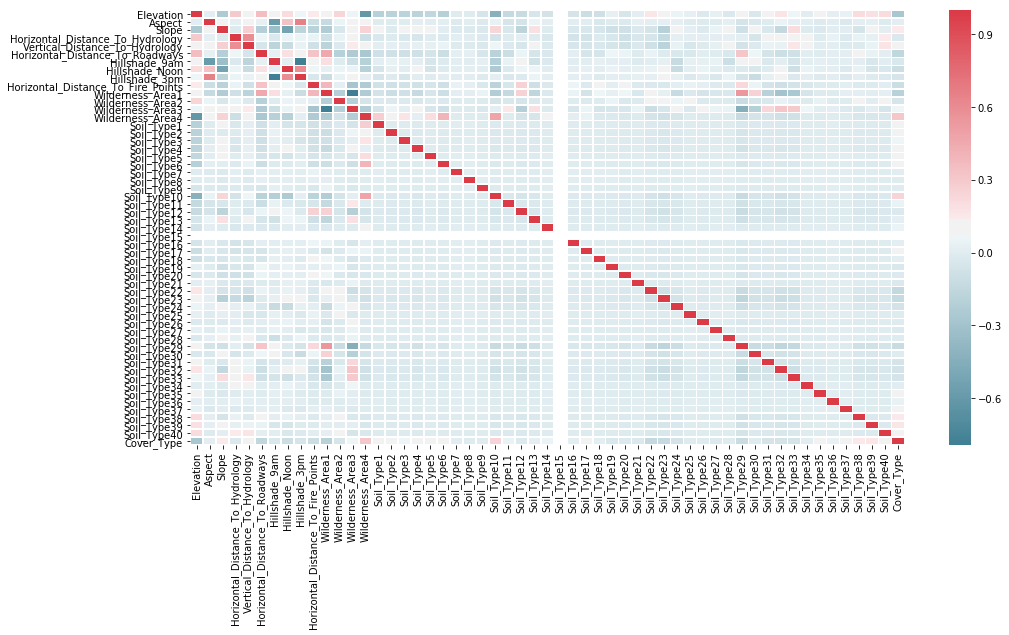

In [11]:
cmap = sb.diverging_palette(220, 10, as_cmap=True)  
plt.figure(figsize = (16,8)) 
sb.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, linewidths=.5)

In [12]:
dataset_new = dataset.loc[:,['Horizontal_Distance_To_Roadways', 'Soil_Type22', 'Soil_Type23', 'Soil_Type29','Horizontal_Distance_To_Fire_Points', 'Slope', 'Wilderness_Area4', 'Soil_Type39', 'Soil_Type38', 'Soil_Type2', 'Soil_Type40', 'Soil_Type4', 'Cover_Type']]

In [13]:
list(dataset_new)

['Horizontal_Distance_To_Roadways',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type29',
 'Horizontal_Distance_To_Fire_Points',
 'Slope',
 'Wilderness_Area4',
 'Soil_Type39',
 'Soil_Type38',
 'Soil_Type2',
 'Soil_Type40',
 'Soil_Type4',
 'Cover_Type']

In [14]:
print(dataset_new['Cover_Type'].value_counts())

2    12207
1     9204
3     1560
7      838
6      680
5      416
4       95
Name: Cover_Type, dtype: int64


In [15]:
corr_new = dataset_new.corr()
corr_new

,Horizontal_Distance_To_Roadways,Soil_Type22,Soil_Type23,Soil_Type29,Horizontal_Distance_To_Fire_Points,Slope,Wilderness_Area4,Soil_Type39,Soil_Type38,Soil_Type2,Soil_Type40,Soil_Type4,Cover_Type
Horizontal_Distance_To_Roadways,1.000000,0.040564,-0.011094,0.316258,0.332780,-0.218483,-0.266659,0.040123,0.088213,-0.085349,0.014536,-0.083642,-0.151574
Soil_Type22,0.040564,1.000000,-0.082266,-0.123998,-0.026689,-0.058471,-0.063934,-0.038863,-0.040016,-0.027774,-0.030101,-0.036066,-0.143963
Soil_Type23,-0.011094,-0.082266,1.000000,-0.164950,-0.030527,-0.197569,-0.085050,-0.051698,-0.053232,-0.036947,-0.040042,-0.047977,-0.134513
Soil_Type29,0.316258,-0.123998,-0.164950,1.000000,0.229596,-0.085289,-0.128194,-0.077923,-0.080236,-0.055689,-0.060355,-0.072315,-0.117789
Horizontal_Distance_To_Fire_Points,0.332780,-0.026689,-0.030527,0.229596,1.000000,-0.186427,-0.233611,-0.014696,-0.017534,-0.079162,-0.000612,-0.075784,-0.106234
Slope,-0.218483,-0.058471,-0.197569,-0.085289,-0.186427,1.000000,0.255148,0.084464,-0.063555,-0.011631,0.017963,0.125777,0.142126
Wilderness_Area4,-0.266659,-0.063934,-0.085050,-0.128194,-0.233611,0.255148,1.000000,-0.040178,-0.041370,0.112630,-0.031120,0.023437,0.310851
Soil_Type39,0.040123,-0.038863,-0.051698,-0.077923,-0.014696,0.084464,-0.040178,1.000000,-0.025147,-0.017454,-0.018916,-0.022665,0.166569
Soil_Type38,0.088213,-0.040016,-0.053232,-0.080236,-0.017534,-0.063555,-0.041370,-0.025147,1.000000,-0.017972,-0.019478,-0.023337,0.147635
Soil_Type2,-0.085349,-0.027774,-0.036947,-0.055689,-0.079162,-0.011631,0.112630,-0.017454,-0.017972,1.000000,-0.013519,-0.016198,0.115235


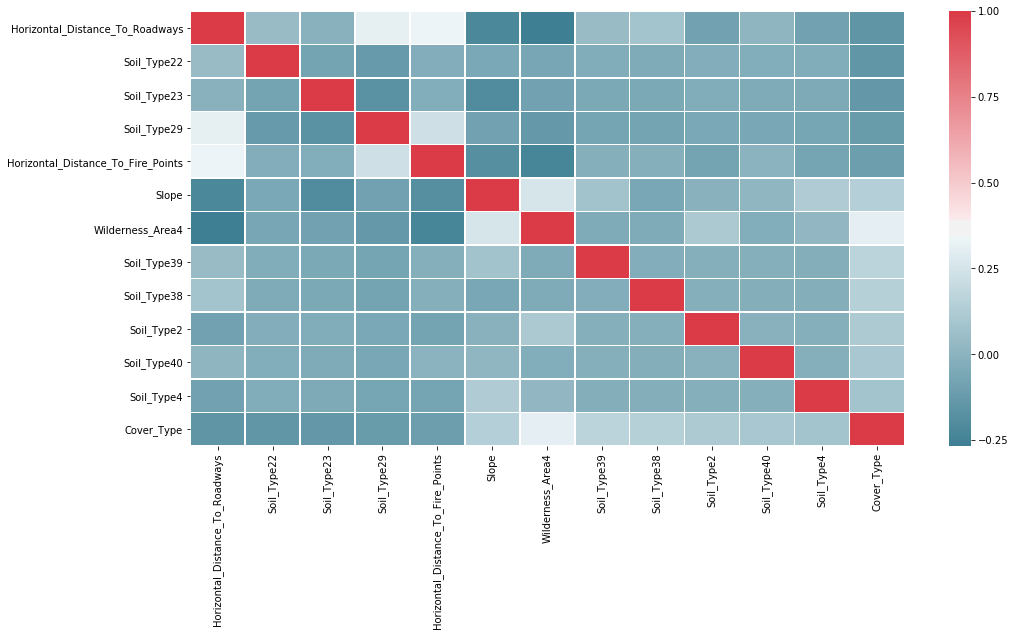

In [16]:
cmap = sb.diverging_palette(220, 10, as_cmap=True)  
plt.figure(figsize = (16,8)) 
sb.heatmap(corr_new, xticklabels=corr_new.columns.values, yticklabels=corr_new.columns.values, cmap=cmap, linewidths=.5)

### Changing the Multi class to Binary class

In [17]:
change = {1:0, 2:1, 3:0, 4:0, 5:0, 6:0, 7:0}
dataset_binary = dataset_new
dataset_binary['Cover_Type'] = dataset_binary['Cover_Type'].replace(change)

In [18]:
print(dataset_binary['Cover_Type'].value_counts())
print(dataset_binary.shape)

0    12793
1    12207
Name: Cover_Type, dtype: int64
(25000, 13)


In [19]:
np.any(dataset_new.isnull())

False

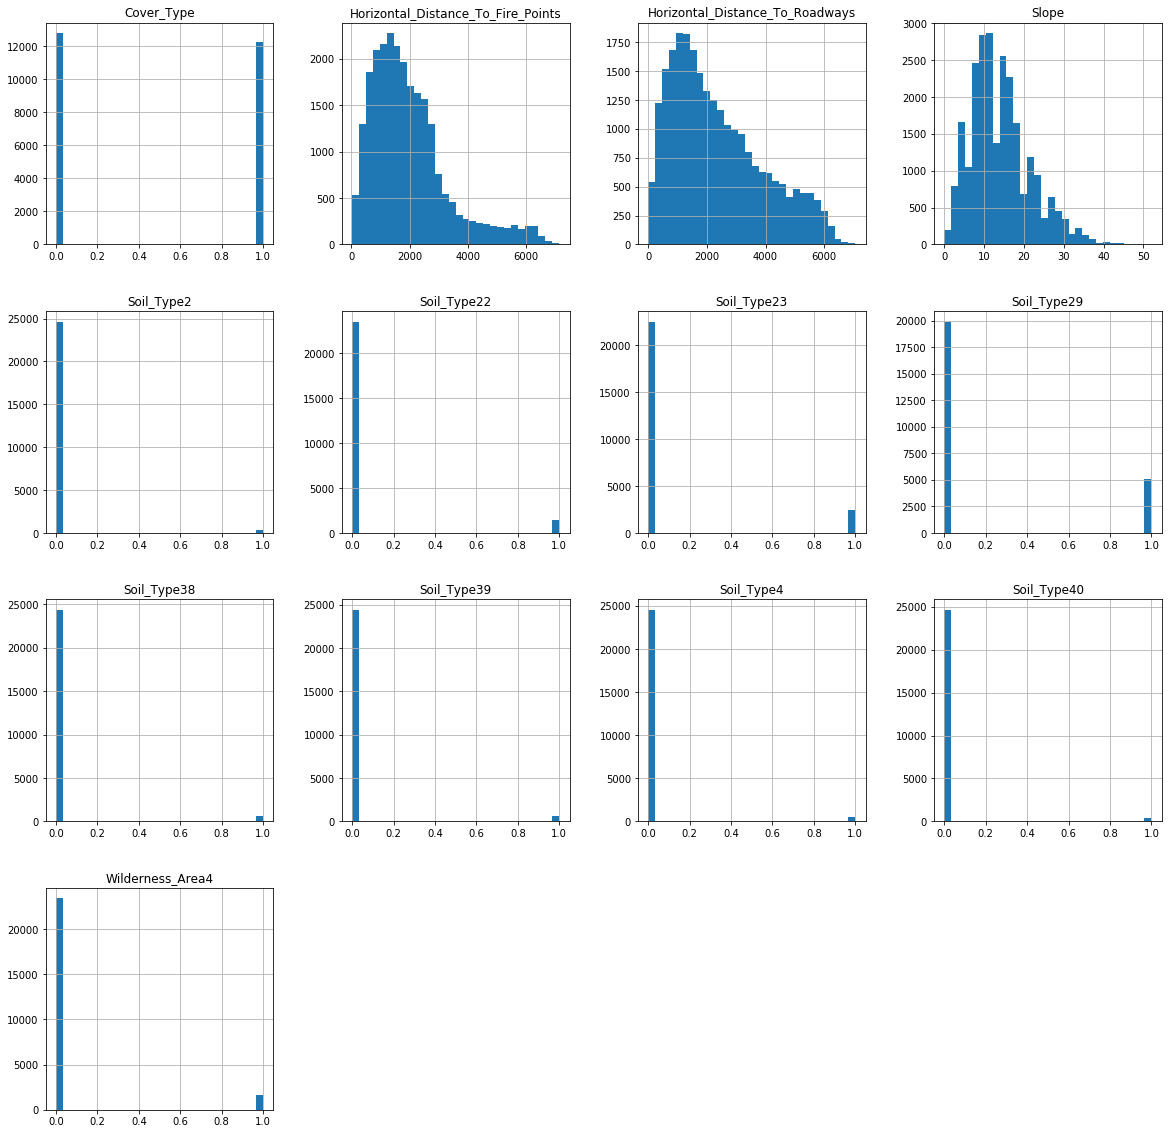

In [21]:
dataset_new.hist(bins = 30, figsize=(20,20))
plt.show()

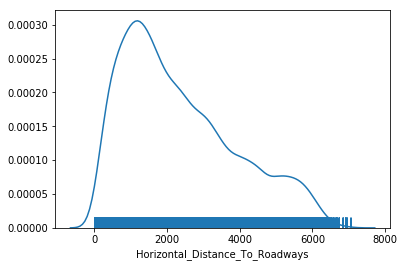

In [22]:
sb.distplot(dataset_new['Horizontal_Distance_To_Roadways'], hist=False, rug=True)

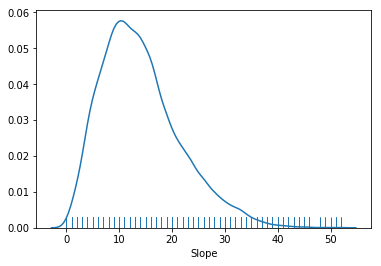

In [23]:
sb.distplot(dataset_new['Slope'], hist=False, rug=True)

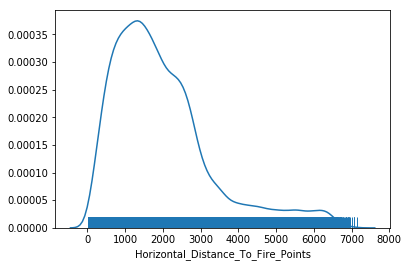

In [24]:
sb.distplot(dataset_new['Horizontal_Distance_To_Fire_Points'], hist=False, rug=True)

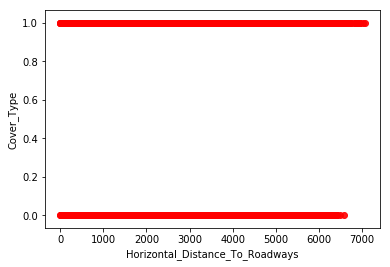

In [25]:
plt.scatter(dataset_binary.iloc[:,0:1],dataset_binary.iloc[:,12:13], color = 'red', alpha=.9)
plt.xlabel("Horizontal_Distance_To_Roadways")
plt.ylabel("Cover_Type")
plt.show()

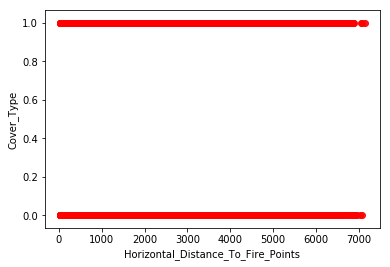

In [26]:
plt.scatter(dataset_binary.iloc[:,4:5],dataset_binary.iloc[:,12:13], color = 'red', alpha=.9)
plt.xlabel("Horizontal_Distance_To_Fire_Points")
plt.ylabel("Cover_Type")
plt.show()

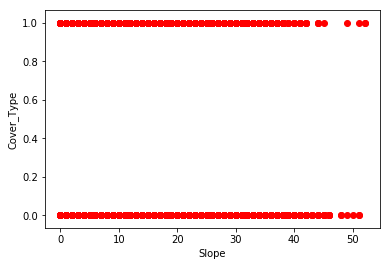

In [27]:
plt.scatter(dataset_binary.iloc[:,5:6],dataset_binary.iloc[:,12:13], color = 'red')
plt.xlabel("Slope")
plt.ylabel("Cover_Type")
plt.show()

## Preliminary Observation

In this workbook, I started with playing and trying out different things with the original data for certain reasons. Initially, I start with selecting some '25000' random samples from the complete dataset as the comlete dataset was really large (around 600,000) samples. So to reduce the computation time, I have sampled the dataset. Apart from that, in this datatset the feature values reach out 55 after applying Encoding so I selected around 15 attributes to the algorithms. I filter out the attributes on the basis of correlation table, out of all attributes, columns that are highly correlated with target variable and some attributes that are negatively correlated are selected. And columns that are highly correlated with each other irrespective of target varible are dropped, to avoid Multi-Collinearity problem. Last thing that I alter in dataset is that I converted the Multi-Class classification problem into Binary classification for easy understanding of the algorithms that are further implemented.

Starting with **data preprocessing** part, there are no Null values in our dataset. And no issues from the part of categorical attributes because the datatset we got was already Encoded. And Normalization of the data will be handled during the implementation of each algorithm and that can be done in data preprocessing part also, so no difference in that.

To **pre-visualize** the data, first of all I understand the imporatnce of each attribute through the correlation matrix, which is used to filter out the atttributes also. Followed by visualizing the histograms for each attribute, we can interpret how data is distributed among different in that particular column. From the histogram, we can easily observe that almost all the **Soil Type** attributes have values 0 for most of the samples and **Cover_Type**(Target attribute) contains around half the values as class 2 follwed by 1 and all other pretty low as compared to the earlier ones. Another most important visualization was distributed plots with 3 different attributes to check how overall data is distributed for that particular attribute. Primary motive was to check that whether our data is **Normally distributed** or not. So none of them was exactly normally distributed, which means our data is skewed. From the last three scatter plots that **Cover_Type**=1 (Actually i.e 2) are the only ones that are present on higher slopes and present over complete range of Horizontal distance to fire and roadways.

# Methods

In [20]:
from sklearn.model_selection import train_test_split
def split(X, T):
    return train_test_split(X, T, test_size = .2) 

In [21]:
X_train, X_test, T_train, T_test = split(dataset_new.iloc[:,:-1], dataset_new.iloc[:,-1:])

print("Shape of X_train{}, X_test{}, T_train{}, T_test{}"
      .format(X_train.shape, X_test.shape, T_train.shape, T_test.shape))

Shape of X_train(20000, 12), X_test(5000, 12), T_train(20000, 1), T_test(5000, 1)


In [22]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
T_train = T_train.reset_index(drop=True)
T_test = T_test.reset_index(drop=True)

In [31]:
onehot_encoder = OneHotEncoder(categories='auto',sparse=False)
training_labels = onehot_encoder.fit_transform(T_train)
test_labels = onehot_encoder.fit_transform(T_test)
print("Shape of T_train{}, T_test{}".format(training_labels.shape, test_labels.shape))

Shape of T_train(20000, 2), T_test(5000, 2)


In [32]:
X_train_np = X_train.values
X_test_np = X_test.values
T_train_np = T_train.values
T_test_np = T_test.values

X_train.shape, X_test.shape, T_train.shape, T_test.shape

((20000, 12), (5000, 12), (20000, 1), (5000, 1))

In [0]:
# Normalization:
def normalize(X):
    mean = X.mean()  #this will compute mean of every column of the dataset
    std = X.std()    #computes the standard deviation 
    return (X - mean) / std

In [0]:
X_train_normalized = normalize(X_train)
X_test_normalized = normalize(X_test)

In [35]:
#Necessary Imports
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import RMSprop, Adam, SGD, Adadelta
from sklearn.metrics import classification_report,accuracy_score, f1_score, precision_score, recall_score, matthews_corrcoef, confusion_matrix, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


## Explanation of the 3 diferent neural network and its reason

In this section, I will be discussing about 3 different choices of neural network based on number of hidden units, hidden layers, optimizers and other hyperparameter tunings.

### Method 1: 
In this method, I will taking and testing our neural network with no specific type but randomly without any specific number of hidden units or any other parameters. In this method, I will explore different activation functions such as 'relu', 'sigmoid', 'selu', 'tanh' with different number of hidden units and some optimizers like RMSProp, Adam, SGD, Adadelta. For this method I will ket the number of hidden of layers constant that is 5 and will not play around it. The purpose for this method is just to explore the network with different combination of parameters. As we are working on classification data, so for the output layer I will be using softmax function as a activation for class prediction.

### Method 2:
After getting a basic intuition behind the neural networks that how it works and exploring different combinations on hidden units, activation functions, optimizers. I decided to develop a network based on "Deep Feed Forward". By increasing the number of hidden units and number of hidden layers in a fully connected neural networks. From the previous method, we can observe that the increasing the number of epoch does not affect our model accuracy. And keeoing the number of hidden units in each layer same. So we will keep that low and all the activation functions have almost same effect in our previous method, so I keep 'ReLu' as our activation function. RMSProp as our optimizer.

### Method 3:
After trying our model on higher number of hidden units and hidden layers in our previous method, we found that even very large number of layers affect our model badly. For this model I try to replicate the structure of Extreme Learning Machine (ELM) network. By  increasing the number of hidden layers upto certain limit for our network and keeping the number of units for the input layer less and more number of hidden units for each of our hidden layers. Similarly keeping the epochs less and RMSProp which performed equivalent to other. Additionally, in this method we will add dropouts in some layer and keeping activation function relu.

### Relate the choice of dataset!

The dataset that I had was "Forest Cover", which has already been been preprocessed with respect categorical data and binary labels. I have  converted the target variable to an indicator matrix. I am building the deep neural network structures using Keras. I have designed three different structures with various alterations in hidden layers and number of neurons in each layer. The idea is to try out these networks with various combinations of hidden layers, hidden units in each layer and tuning with different hyperparametrs and come up with best structure for our neural network. For the first method I ket everything on random basis for trying out number of ecperiments. But for another 2 methods I have selected the networks based in the experiments that I did in the method 1 with more number of hidden layers and hidden units in each  of them.

### Explanation of codes for each structure

Here are the key points wrt implemenatation of Deep Learning Neural Networks:

* I have used **Keras** to implement all the three models.
* I have used **Keras Sequential model** to linearly stack the layers for all the three models.
* I used **keras.layers.Dense** to densely connect the  Layers.
* I have used **keras.layers.Dropout** to randomly drop the hidden units in that particular layer.
* I have used **keras.layers.Activation** for Activation Functions like 'relu', 'selu', 'tanh', 'sigmoid'
* I have used **categorical_crossentropy**  to determine losses beacuse my data is multi class classification problem.
* I have used **keras.optimizers.RMSprop** and **keras.optimizers.Adam**.
* I have used various evaluation metrics to evaluate my model.
* For all the models, I have used softmax as the activation function for the output layer to predict our classes.




## Model 1:


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
20000/20000 [==============================] - 0s 24us/step - loss: 0.6595 - acc: 0.5702
Epoch 2/20
20000/20000 [==============================] - 0s 8us/step - loss: 0.5886 - acc: 0.6796
Epoch 3/20
20000/20000 [==============================] - 0s 8us/step - loss: 0.5802 - acc: 0.6824
Epoch 4/20
20000/20000 [==============================] - 0s 8us/step - loss: 0.5767 - acc: 0.6850
Epoch 5/20
20000/20000 [==============================] - 0s 7us/step - loss: 0.5735 - acc: 0.6859
Epoch 6/20
20000/20000 [==============================] - 0s 7us/step - loss: 0.5694 - acc: 0.6870
Epoch 7/20
20000/20000 [==============================] - 0s 6us/step - loss: 0.5658 - acc: 0.6906
Epoch 8/20
20000/20000 [==============================] - 0s 7us/step - loss: 0.5680 - acc: 0.6903
Epoch 9/20
20000/20000 [==============================] - 0s 8us/step - loss: 0.5643 - 

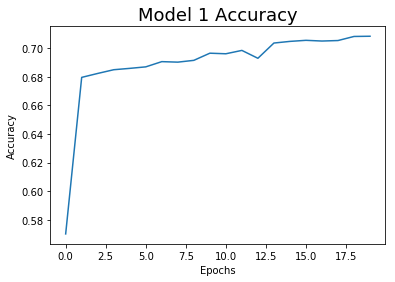

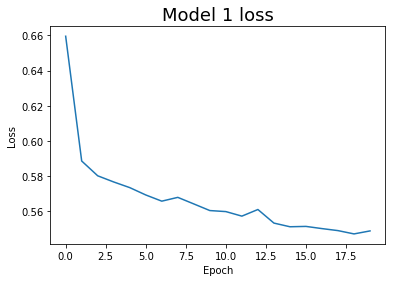


 Classification Report 
 
               precision    recall  f1-score   support

           0       0.77      0.59      0.67      2570
           1       0.65      0.81      0.72      2430

   micro avg       0.70      0.70      0.70      5000
   macro avg       0.71      0.70      0.69      5000
weighted avg       0.71      0.70      0.69      5000


 Confusion Matrix 
 [[1518 1052]
 [ 463 1967]]

 Accuracy: 69.7 %

 F1 Score:  0.695

 Precision:  0.709

 Recall:  0.7


In [36]:

def model1():
    model1 = Sequential()

    #input layer with no. of features as input_dim and 'relu' as activation function
    model1.add(Dense(12, activation='relu', input_dim= X_train_normalized.shape[1]))

    #adding 5 hidden layers with different number of neurons
    model1.add(Dense(32, activation='relu'))

    model1.add(Dense(64,activation='relu'))

    model1.add(Dense(64,activation='relu'))

    model1.add(Dense(32,activation='relu'))

    model1.add(Dense(32,activation='relu'))

    #Output layer with softmax activation 
    model1.add(Dense(2, activation='softmax'))

    #Choice of optimizer : Adam
    adam = Adam(lr=0.001, epsilon=None, decay=0.0)
    model1.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    #fitting the model
    history = model1.fit(X_train_normalized, training_labels, epochs=20, batch_size=512, verbose=1)
    #Model Evaluation
    score = model1.evaluate(X_test_normalized, test_labels, batch_size=512)

    #Plotting epoch Vs Accuracy
    plt.plot(history.history['acc'])
    plt.title("Model 1 Accuracy", fontsize = 18)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.show()

    #Plotting epoch Vs Loss
    plt.plot(history.history['loss'])
    plt.title('Model 1 loss', fontsize = 18)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()


    #Predict the values for test set
    y_pred = model1.predict_classes(X_test_normalized)

    #print the classification report
    print("\n Classification Report \n \n",classification_report(T_test_np, y_pred))

    #print confusion matrix
    print("\n Confusion Matrix \n",confusion_matrix(T_test,y_pred))
    print("\n Accuracy:", round((accuracy_score(T_test,y_pred)*100),2), "%")
    print("\n F1 Score: ",round(f1_score(T_test,y_pred, average="macro"),3))
    print("\n Precision: ",round(precision_score(T_test,y_pred, average="macro"),3))
    print("\n Recall: ",round(recall_score(T_test,y_pred, average="macro"),3))
    
    return y_pred

y_pred = model1()

## Model 2:

Epoch 1/7
20000/20000 [==============================] - 1s 61us/step - loss: 7.7085 - acc: 0.5108
Epoch 2/7
20000/20000 [==============================] - 1s 41us/step - loss: 7.8955 - acc: 0.5101
Epoch 3/7
20000/20000 [==============================] - 1s 40us/step - loss: 7.8955 - acc: 0.5101
Epoch 4/7
20000/20000 [==============================] - 1s 41us/step - loss: 7.8955 - acc: 0.5101
Epoch 5/7
20000/20000 [==============================] - 1s 40us/step - loss: 7.8955 - acc: 0.5101
Epoch 6/7
20000/20000 [==============================] - 1s 40us/step - loss: 7.8955 - acc: 0.5101
Epoch 7/7
5000/5000 [==============================] - 0s 31us/step


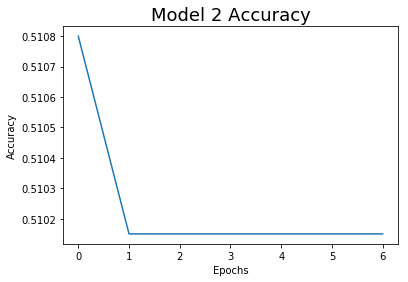

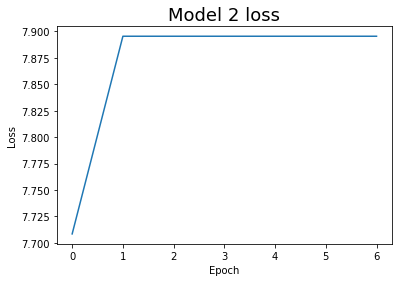


 Classification Report 
 
               precision    recall  f1-score   support

           0       0.51      1.00      0.68      2570
           1       0.00      0.00      0.00      2430

   micro avg       0.51      0.51      0.51      5000
   macro avg       0.26      0.50      0.34      5000
weighted avg       0.26      0.51      0.35      5000


 Confusion Matrix 
 [[2570    0]
 [2430    0]]

 Accuracy: 51.4 %

 F1 Score:  0.339

 Precision:  0.257

 Recall:  0.5


In [37]:
def model2():
    model2 = Sequential()


    #input layer with no. of features as input_dim and 'relu' as activation function 
    model2.add(Dense(128, activation='relu', input_dim=X_train_normalized.shape[1]))

    #adding 10 hidden layers with 128 neurons 
    model2.add(Dense(128, activation='relu'))


    model2.add(Dense(128,activation='relu'))

    model2.add(Dense(128,activation='relu'))


    model2.add(Dense(128,activation='relu'))

    model2.add(Dense(128,activation='relu'))

    model2.add(Dense(128,activation='relu'))


    model2.add(Dense(128,activation='relu'))


    model2.add(Dense(128,activation='relu'))

    model2.add(Dense(128,activation='relu'))

    model2.add(Dense(128,activation='relu'))


    #Output layer with softmax activation 
    model2.add(Dense(2, activation='softmax'))

    #Choice of optimizer : rmsprop
    rmsprop = RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0)
    model2.compile(loss='categorical_crossentropy', optimizer= rmsprop, metrics=['accuracy'])

    #fitting the model
    history = model2.fit(X_train_normalized, training_labels, epochs=7, batch_size=512, verbose=1)

    #Model Evaluation
    score_2 = model2.evaluate(X_test_normalized, test_labels, batch_size=512)

    #Plotting epoch Vs Accuracy
    plt.plot(history.history['acc'])
    plt.title("Model 2 Accuracy", fontsize = 18)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.show()

    #Plotting epoch Vs Loss
    plt.plot(history.history['loss'])
    plt.title('Model 2 loss', fontsize = 18)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

    #Predict the values for test set
    y_pred_2 = model2.predict_classes(X_test_normalized)

    #print the classification report
    print("\n Classification Report \n \n",classification_report(T_test_np,y_pred_2))

    #print confusion matrix
    print("\n Confusion Matrix \n",confusion_matrix(T_test,y_pred_2))
    print("\n Accuracy:", round((accuracy_score(T_test,y_pred_2)*100),2), "%")
    print("\n F1 Score: ",round(f1_score(T_test,y_pred_2, average="macro"),3))
    print("\n Precision: ",round(precision_score(T_test,y_pred_2, average="macro"),3))
    print("\n Recall: ",round(recall_score(T_test,y_pred_2, average="macro"),3))

    return y_pred_2

y_pred_2 = model2()


## Model 3:


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch 1/10
20000/20000 [==============================] - 1s 42us/step - loss: 0.6179 - acc: 0.6508
Epoch 2/10
20000/20000 [==============================] - 0s 12us/step - loss: 0.5952 - acc: 0.6804
Epoch 3/10
20000/20000 [==============================] - 0s 12us/step - loss: 0.5945 - acc: 0.6834
Epoch 4/10
20000/20000 [==============================] - 0s 12us/step - loss: 0.5903 - acc: 0.6818
Epoch 5/10
20000/20000 [==============================] - 0s 12us/step - loss: 0.5890 - acc: 0.6834
Epoch 6/10
20000/20000 [==============================] - 0s 12us/step - loss: 0.5825 - acc: 0.6850
Epoch 7/10
20000/20000 [==============================] - 0s 12us/step - loss: 0.5838 - acc: 0.6850
Epoch 8/10
20000/20000 [==============================] - 0s 12us/step - loss: 0.5823 - acc: 0.6859
Epoch 9/10
20000/20000 [==============================] - 0s 12us/step - loss: 0.5753

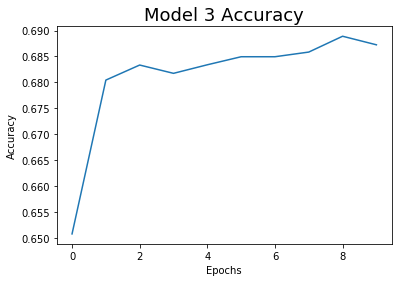

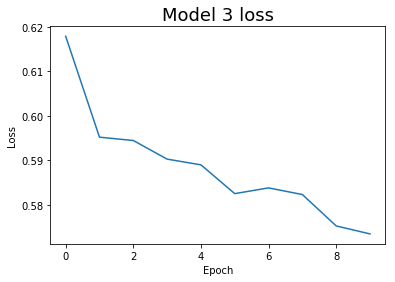


 Classification Report 
 
               precision    recall  f1-score   support

           0       0.80      0.51      0.62      2570
           1       0.63      0.87      0.73      2430

   micro avg       0.68      0.68      0.68      5000
   macro avg       0.71      0.69      0.68      5000
weighted avg       0.72      0.68      0.67      5000


 Confusion Matrix 
 [[1314 1256]
 [ 322 2108]]

 Accuracy: 68.44 %

 F1 Score:  0.676

 Precision:  0.715

 Recall:  0.689


In [38]:
def model3():
    model3 = Sequential()

    #input layer with no. of features as input_dim and 'relu' as activation function 
    model3.add(Dense(30, activation='relu', input_dim=X_train_normalized.shape[1]))

    #adding 7 hidden layers
    model3.add(Dense(30, activation='relu'))
    model3.add(Dropout(0.1))


    model3.add(Dense(30,activation='relu'))

    model3.add(Dense(30,activation='relu'))
    model3.add(Dropout(0.5))

    model3.add(Dense(30,activation='relu'))


    model3.add(Dense(30,activation='relu'))
    model3.add(Dropout(0.3))


    model3.add(Dense(30,activation='relu'))

    model3.add(Dense(30,activation='relu'))



    #Output layer with softmax activation 
    model3.add(Dense(2, activation='softmax'))

    #Choice of optimizer : rmsprop
    adam = Adam(lr=0.01,epsilon=None, decay=0.0)
    model3.compile(loss='categorical_crossentropy', optimizer= adam, metrics=['accuracy'])

    #fitting the model
    history = model3.fit(X_train_normalized, training_labels, epochs=10, batch_size=512, verbose=1)

    #Model Evaluation
    score_2 = model3.evaluate(X_test_normalized, test_labels, batch_size=512)

    #Plotting epoch Vs Accuracy
    plt.plot(history.history['acc'])
    plt.title("Model 3 Accuracy", fontsize = 18)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.show()

    #Plotting epoch Vs Loss
    plt.plot(history.history['loss'])
    plt.title('Model 3 loss', fontsize = 18)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

    #Predict the values for test set
    y_pred_3 = model3.predict_classes(X_test_normalized)

    #print the classification report
    print("\n Classification Report \n \n",classification_report(T_test_np,y_pred_3))

    #print confusion matrix
    print("\n Confusion Matrix \n",confusion_matrix(T_test,y_pred_3))
    print("\n Accuracy:", round((accuracy_score(T_test,y_pred_3)*100),2), "%")
    print("\n F1 Score: ",round(f1_score(T_test,y_pred_3, average="macro"),3))
    print("\n Precision: ",round(precision_score(T_test,y_pred_3, average="macro"),3))
    print("\n Recall: ",round(recall_score(T_test,y_pred_3, average="macro"),3))

    return y_pred_3

y_pred_3 = model3()


## Explanation of experimental code

So far we have designemd and implemented 3 different structure of neural networks basesd on certain observation:

1. Our first method was based on our random choice of number of hidden units and other parameters . We tried out different possible combination  of parameters by keeping number of hidden layers constant. So I tried out different activation functions with different optimizers and find out the best combination.

2. In our second method, I try different structure of neural network having more number of neurons with more hidden layers deeply connected with each other. But keeping all the parameters same as of our preious method results.

3. From different experiments on method 2, we found that if number of layers or units increased after certain limit then the performance of our model decline. So in this method, we explored another method which is less number of neurons in input layer as comapred to the hidden layers.

# Results

## Plots for the results

### Evaluation Metrics

After all the preprocessing and applying various algorithms on our dataset, ultimately we need to check or visualize its performance. And there different means for performance evaluation in each category of Machine Learrning models. For Classification models are to check for Precision, Recall, Area Under the Curve, Accuracy are various performace metrics. 

1. **Confusion Matrix**: This can be used for both binary as well as Multiple classification problems. Four terms are associated with it:

    i) True Positives(TP):    This is the case when actual class of data points are True and predicted class is also True.
    
    ii) True Negatives(TN):   This is the case when actual class of data points are False predicted class is also False.
    
    iii) False Positives(FP): It is the case where the actual class of data points are False and predicted is True.
    
    iv) False Negatives(FN):  It is the case where the actual class of data points are True and predicted is False.
    
2. **Accuracy**: It is simply number of correct predictions out of all the predictions made by a model.

$$
Accuracy = \frac {TP + TN} {TP + FP + FN + TN} 
$$

Genearlly, it should not be used when majority of target variable in our dataset are of single class.

3. **Precision**: It just tells us that how accurate our predictions are. 
$$
Precision = \frac {TP} {TP + FP} 
$$

4. **Recall**: Recall tells us about the actual positives.
$$
Recall = \frac {TP} {TP + FN} 
$$

5. **F1 Score**: Each time we do not need to take care of both Precision and Recall, as both show opposite behaviour to each other. If Recall increase, then precision decreases and vice-versa. So F1 is the single score that represents both Precision and Recall. We calculate by taking Harmonic Mean of both.


$$
F1  Score: \frac {TP}{TP + \frac {FN + FP}{2}}
$$

### ROC Curve

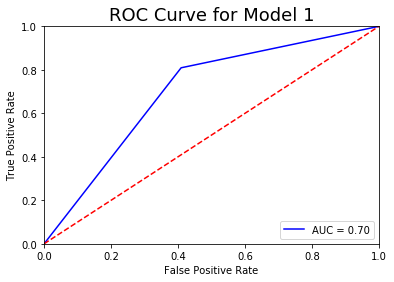

In [39]:
fpr, tpr, threshold = roc_curve(T_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.title('ROC Curve for Model 1', fontsize = 18)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

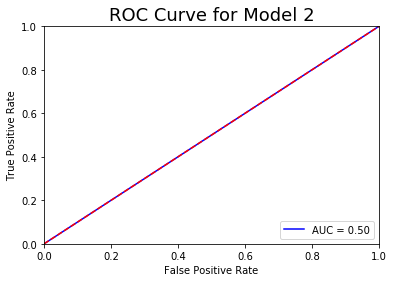

In [40]:
fpr, tpr, threshold = roc_curve(T_test_np, y_pred_2)
roc_auc = auc(fpr, tpr)

plt.title('ROC Curve for Model 2', fontsize = 18)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

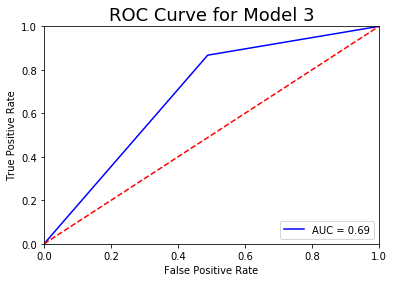

In [41]:
fpr, tpr, threshold = roc_curve(T_test_np, y_pred_3)
roc_auc = auc(fpr, tpr)

plt.title('ROC Curve for Model 3', fontsize = 18)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Plotting the curve between actual and predicted values randomly for 300 values, otherwise visulaization would not be clear

Text(0.5, 1.0, 'Model 1 : Predicted Vs Output')

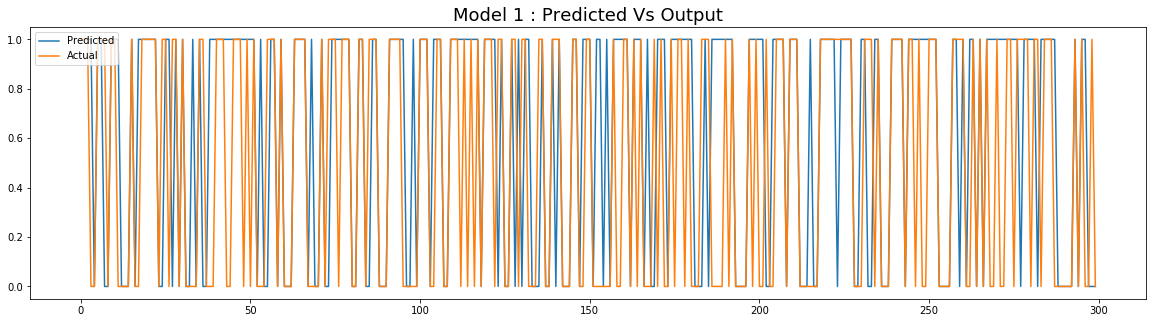

In [42]:
plt.figure(figsize=(20,5))
plt.plot(y_pred[200:500], label = 'Predicted')
plt.plot(T_test_np[200:500], label = 'Actual')
plt.legend(loc='upper left')
plt.title("Model 1 : Predicted Vs Output", fontsize = 18)

Text(0.5, 1.0, 'Model 2 : Predicted Vs Output')

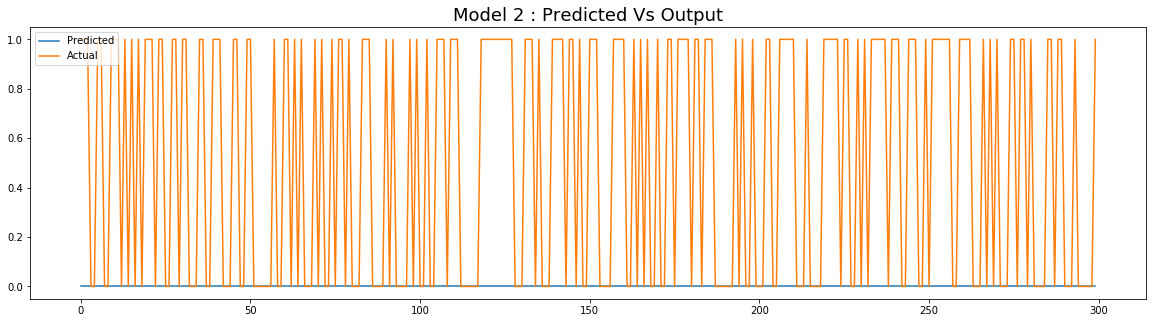

In [43]:
plt.figure(figsize=(20,5))
plt.plot(y_pred_2[300:600], label = 'Predicted')
plt.plot(T_test_np[300:600], label = 'Actual')
plt.legend(loc='upper left')
plt.title("Model 2 : Predicted Vs Output", fontsize = 18)

Text(0.5, 1.0, 'Model 3 : Predicted Vs Output')

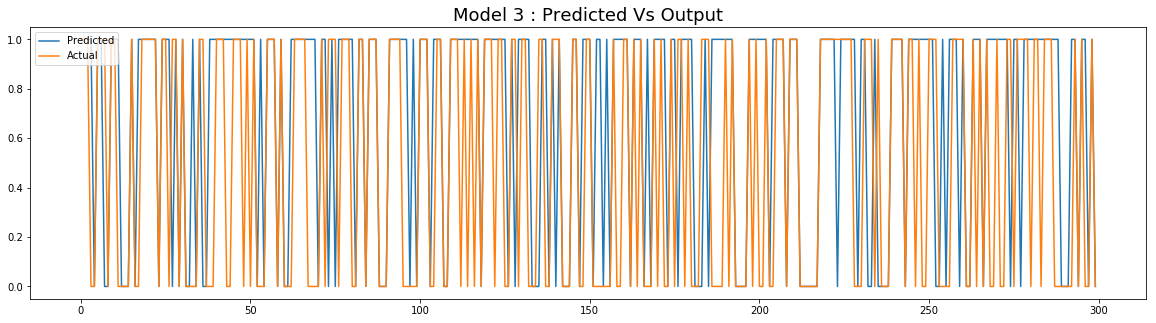

In [44]:
plt.figure(figsize=(20,5))
plt.plot(y_pred_3[200:500], label = 'Predicted')
plt.plot(T_test_np[200:500], label = 'Actual')
plt.legend(loc='upper left')
plt.title("Model 3 : Predicted Vs Output", fontsize = 18)

## Discussion about choice of network

Above we have implemented 3 different structure of Neural Network with various combination of hidden units and hidden layers. Each of them showing different results. For the classification data accuracy is not only the measure but there are other evaluation metrics also like Precision, Recall, F1 score etc. It depends on our requirement on our need, so we design our structure accordingly.

So in our case the first method we selected, which is purely random having no particular structure performs better from all other in all terms of evaluation. It has highest accuracy of about 69%, 19% greater then other 2 structures. Another important evaluation parameter that is F1 score which is also greateest for model 1 that .689.

Below is the table for comaprison for evaluation metrics for all models:

<table style="width:50%">
    <h4 align='center'>Results</h4>
  <tr>
    <th></th>
    <th>Accuracy</th>
    <th>F1 score</th> 
    <th>Precision</th>
    <th>Recall</th>
  </tr>
  <tr>
    <th>Method 1</th>
    <td>70%</td> 
    <td>0.703</td>
    <td>0.714</td>
    <td>0.707</td>
  </tr>
    <tr>
    <th>Method 2</th>
    <td>51%</td> 
    <td>0.338</td>
    <td>0.256</td>
    <td>0.5</td>
  </tr>
      <tr>
    <th>Method 3</th>
    <td>70%</td> 
    <td>0.693</td>
    <td>0.724</td>
    <td>0.702</td>
  </tr>
 
</table>

# Conclusion
This workbook was really interesting and challenging workbook because here I was exposed to the deep learning concepts and libraries for the very first time. I tried learning 2 different libraries for deep learning that is TensorFlow and Keras. They are actually different in terms of abstraction. Keras is built on tensorflow and is much more absract then tensorflow. So it is quite easy to work on keras especially when we need to get started on some of these libraries. 

I explored both of these libraries, implemented neural networks on classification dataset, faced a lot of new challenges and problem but most importantly learned a lot of new things. I get to know about how deep neural network works and for that I have tried 3 different structure. 

So the first structure was totally on the random basis for 5 layers and tried different parameters. But for the second, I get some idea about the factors affecting accuracy of model, so tried different network with more hidden layers and hidden units. And for the third one I learned a new thing that sometimes even large number of layers degrade our model.


# Further Analysis

In [0]:
#Record Training times
training_time = []

Epoch 1/20
20000/20000 [==============================] - 1s 41us/step - loss: 0.6191 - acc: 0.6400
Epoch 2/20
20000/20000 [==============================] - 0s 7us/step - loss: 0.5870 - acc: 0.6832
Epoch 3/20
20000/20000 [==============================] - 0s 8us/step - loss: 0.5844 - acc: 0.6848
Epoch 4/20
20000/20000 [==============================] - 0s 7us/step - loss: 0.5810 - acc: 0.6854
Epoch 5/20
20000/20000 [==============================] - 0s 7us/step - loss: 0.5792 - acc: 0.6845
Epoch 6/20
20000/20000 [==============================] - 0s 8us/step - loss: 0.5767 - acc: 0.6868
Epoch 7/20
20000/20000 [==============================] - 0s 8us/step - loss: 0.5722 - acc: 0.6857
Epoch 8/20
20000/20000 [==============================] - 0s 7us/step - loss: 0.5710 - acc: 0.6877
Epoch 9/20
20000/20000 [==============================] - 0s 7us/step - loss: 0.5695 - acc: 0.6881
Epoch 10/20
20000/20000 [==============================] - 0s 8us/step - loss: 0.5661 - acc: 0.6905
Epoch 11

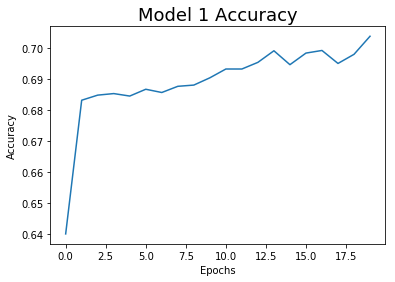

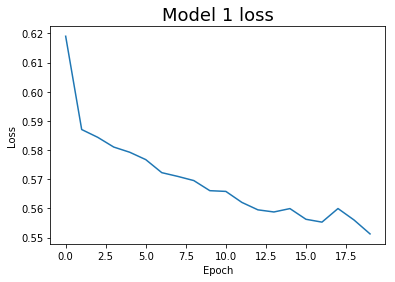


 Classification Report 
 
               precision    recall  f1-score   support

           0       0.76      0.58      0.66      2570
           1       0.64      0.81      0.72      2430

   micro avg       0.69      0.69      0.69      5000
   macro avg       0.70      0.69      0.69      5000
weighted avg       0.70      0.69      0.69      5000


 Confusion Matrix 
 [[1483 1087]
 [ 469 1961]]

 Accuracy: 68.88 %

 F1 Score:  0.686

 Precision:  0.702

 Recall:  0.692
Time taken by Model 1 :  5.55016303062439 seconds


In [46]:
import time
start1 = time.time()
model1()
end1 = time.time()
print("Time taken by Model 1 : ",(end1 - start1),"seconds")
training_time.append((end1 - start1))

Epoch 1/7
20000/20000 [==============================] - 2s 76us/step - loss: 7.7101 - acc: 0.5101
Epoch 2/7
20000/20000 [==============================] - 1s 42us/step - loss: 7.8955 - acc: 0.5101
Epoch 3/7
20000/20000 [==============================] - 1s 41us/step - loss: 7.8955 - acc: 0.5101
Epoch 4/7
20000/20000 [==============================] - 1s 40us/step - loss: 7.8955 - acc: 0.5101
Epoch 5/7
20000/20000 [==============================] - 1s 40us/step - loss: 7.8955 - acc: 0.5101
Epoch 6/7
20000/20000 [==============================] - 1s 41us/step - loss: 7.8955 - acc: 0.5101
Epoch 7/7
5000/5000 [==============================] - 0s 51us/step


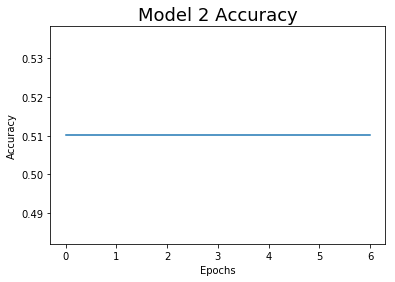

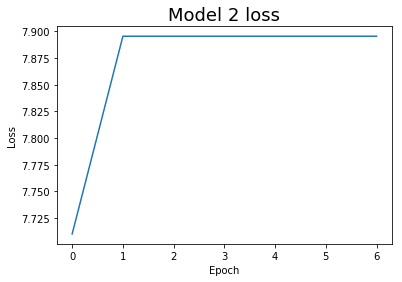


 Classification Report 
 
               precision    recall  f1-score   support

           0       0.51      1.00      0.68      2570
           1       0.00      0.00      0.00      2430

   micro avg       0.51      0.51      0.51      5000
   macro avg       0.26      0.50      0.34      5000
weighted avg       0.26      0.51      0.35      5000


 Confusion Matrix 
 [[2570    0]
 [2430    0]]

 Accuracy: 51.4 %

 F1 Score:  0.339

 Precision:  0.257

 Recall:  0.5
Time taken by Model 2 :  8.606107711791992 seconds


In [47]:
import time
start2 = time.time()
model2()
end2 = time.time()
print("Time taken by Model 2 : ",(end2 - start2),"seconds")
training_time.append((end2 - start2))

Epoch 1/10
20000/20000 [==============================] - 1s 58us/step - loss: 0.6148 - acc: 0.6581
Epoch 2/10
20000/20000 [==============================] - 0s 12us/step - loss: 0.5976 - acc: 0.6818
Epoch 3/10
20000/20000 [==============================] - 0s 13us/step - loss: 0.5925 - acc: 0.6827
Epoch 4/10
20000/20000 [==============================] - 0s 12us/step - loss: 0.5901 - acc: 0.6804
Epoch 5/10
20000/20000 [==============================] - 0s 12us/step - loss: 0.5859 - acc: 0.6843
Epoch 6/10
20000/20000 [==============================] - 0s 12us/step - loss: 0.5861 - acc: 0.6879
Epoch 7/10
20000/20000 [==============================] - 0s 12us/step - loss: 0.5795 - acc: 0.6879
Epoch 8/10
20000/20000 [==============================] - 0s 12us/step - loss: 0.5798 - acc: 0.6890
Epoch 9/10
20000/20000 [==============================] - 0s 12us/step - loss: 0.5758 - acc: 0.6932
Epoch 10/10
5000/5000 [==============================] - 0s 60us/step


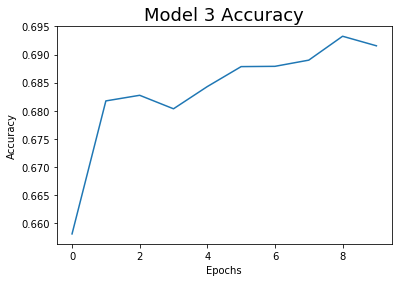

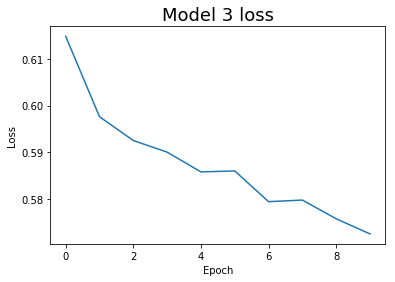


 Classification Report 
 
               precision    recall  f1-score   support

           0       0.81      0.51      0.63      2570
           1       0.63      0.87      0.73      2430

   micro avg       0.69      0.69      0.69      5000
   macro avg       0.72      0.69      0.68      5000
weighted avg       0.72      0.69      0.68      5000


 Confusion Matrix 
 [[1318 1252]
 [ 313 2117]]

 Accuracy: 68.7 %

 F1 Score:  0.679

 Precision:  0.718

 Recall:  0.692
Time taken by Model 3 :  5.551471710205078 seconds


In [48]:
import time
start3 = time.time()
model3()
end3 = time.time()
print("Time taken by Model 3 : ",(end3 - start3),"seconds")
training_time.append((end3 - start3))

In [23]:
from pandas import DataFrame
df = DataFrame(X_train)
df.to_csv("X_train.csv", index = None, header=True)

df = DataFrame(X_test)
df.to_csv("X_test.csv", index = None, header=True)

df = DataFrame(T_train)
df.to_csv("T_train.csv", index = None, header=True)

df = DataFrame(T_test)
df.to_csv("T_test.csv", index = None, header=True)

### I ran all my methods on google colab GPU and below is my google colab link:

https://colab.research.google.com/drive/11wggvPW9_YfN4-3mdHEUnq4ZtFxmryTT

#### GPU times
[6.225923538208008, 3.9569056034088135, 5.342952728271484]

<table style="width:50%">
    <h4 align='center'>Results</h4>
  <tr>
    <th></th>
    <th>GPU</th>
    <th>CPU</th> 
  </tr>
  <tr>
    <th>Method 1</th>
    <td>6.225923538208008</td> 
    <td>5.55016303062439</td>
  </tr>
    <tr>
    <th>Method 2</th>
    <td>3.9569056034088135</td> 
    <td>8.606107711791992</td>
  </tr>
      <tr>
    <th>Method 3</th>
    <td>5.342952728271484</td> 
    <td>5.551471710205078</td>
  </tr>
 
</table>

### Results:
Though the results from GPU are not better as compared to our normal CPU. This could be because of small size of our data.
GPU could results better on may be very large dataset.
